In [2]:
import pandas as pd             # Bring in the Pandas Package
import numpy as np              # Numberical Python, we will use this at the end.
import matplotlib as mpl               # graphics package
import matplotlib.pyplot as plt # Our plotting tool

In [3]:
url = "https://github.com/mwaugh0328/Data_Bootcamp_Fall_2017/raw/master/data_bootcamp_1030/pwt_inclass.csv"                   # Here is the correct link
pwt = pd.read_csv(url, encoding = "latin1")  

# If this does not work, read this one in
# https://github.com/mwaugh0328/Data_Bootcamp_Fall_2017/raw/master/data_bootcamp_1030/pwt_inclass.csv

In [4]:
pwt.head()

,countrycode,country,currency_unit,year,rgdpe,rgdpo,pop,emp,avh,hc,...,csh_g,csh_x,csh_m,csh_r,pl_c,pl_i,pl_g,pl_x,pl_m,pl_k
0,AGO,Angola,Kwanza,1950,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AGO,Angola,Kwanza,1951,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AGO,Angola,Kwanza,1952,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AGO,Angola,Kwanza,1953,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AGO,Angola,Kwanza,1954,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
pwt["gdp_pop"] = pwt["rgdpe"] / pwt["pop"] # This makes GDP per person or ``average income in that country''

pwt_2005 = pwt.set_index("year").loc[2005]        # This will get me just the 2005 year...

In [6]:
pwt_2005.head()

,countrycode,country,currency_unit,rgdpe,rgdpo,pop,emp,avh,hc,ccon,...,csh_x,csh_m,csh_r,pl_c,pl_i,pl_g,pl_x,pl_m,pl_k,gdp_pop
year,,,,,,,,,,,,,,,,,,,,,
2005,AGO,Angola,Kwanza,52943.320310,61016.523440,16.489021,7.738189,NaN,NaN,30814.164060,...,0.700307,-0.202887,-0.083627,0.662680,0.576069,0.591150,0.493786,0.622956,0.560122,3210.822541
2005,ALB,Albania,Lek,16960.060550,17289.283200,3.141800,0.932000,NaN,2.993224,16365.730470,...,0.063309,-0.279105,-0.018865,0.526328,0.605834,0.207416,0.601361,0.541775,0.644332,5398.198660
2005,ARG,Argentina,Argentine Peso,409609.375000,399135.656300,38.681174,13.987501,1840.9,2.764784,306531.312500,...,0.150914,-0.113287,-0.003533,0.424934,0.484048,0.518339,0.665829,0.634466,0.440873,10589.372882
2005,ARM,Armenia,Armenian Dram,13478.196290,13923.870120,3.065954,1.128365,NaN,3.012273,12957.262700,...,0.099134,-0.215817,-0.011175,0.326691,0.543520,0.316758,0.678810,0.562906,0.509696,4396.085620
2005,ATG,Antigua and Barbuda,East Caribbean Dollar,1176.966309,894.290588,0.083916,0.036395,NaN,NaN,1146.174438,...,0.155397,-0.918621,0.266593,1.044244,1.526457,0.334405,0.868072,0.639315,1.941484,14025.529208


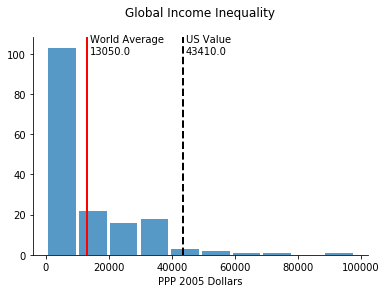

In [7]:
fig, ax = plt.subplots()

ax.hist(pwt_2005.gdp_pop, rwidth= 0.9, alpha = 0.75)

# The rwidth is the spacing between the bars...
#

ax.set_xlabel("PPP 2005 Dollars")

ax.set_title("Global Income Inequality\n")

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

# All the stuff is the same as before... below is the new stuff.

avg = pwt_2005.gdp_pop.mean() # This computes the average value.

ax.axvline(x=avg,           # Set the value equall to the average
           color='r',       # make the color red
           label='Average', # this is the label (shows up in the legend)
           linestyle='-',   # the line style
           linewidth=2)     # thickness of the line

message = "World Average \n" + str(round(avg,-1)) # Create the message, convert the number to a string,
                                                  # then add it 
                                                  
ax.text(avg + 1000, # This is the placement on the x-axis, I'm shifting it righ to see it better
        100, # placement on the y-axis
        message,  # The message
        horizontalalignment='left') # then alling everything on the left.

usval = float(pwt_2005[pwt_2005.countrycode == "USA"].gdp_pop)
# Note how I'm doing this, I'm slicing the data frame by a boolean operation. So take the value
# where the countrycode is USA, return gdp_pop. The one issue here is that it returns a dataframe
# not a floating point value. So I use float to convert it.

ax.axvline(x= usval, 
           color='k', 
           label= "USA", 
           linestyle='--', 
           linewidth=2) # Put in the US Value
# Same deal as above

message = "US Value \n" + str(round(usval,-1))

ax.text(usval +1000, 100, message, horizontalalignment='left')
# Same deal as above.

plt.savefig("hist.png", bbox_inches="tight", dpi = 600)

plt.show()

### Education and Level of Development (and the benefits of logs)

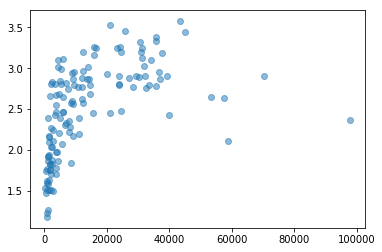

In [8]:
fix, ax = plt.subplots()

ax.scatter(pwt_2005["gdp_pop"], pwt_2005["hc"],     # x,y variables 
            alpha= 0.50) # Then this last command specifies how dark or light the bubbles are...

plt.show()

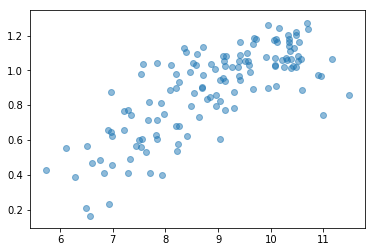

In [9]:
fig, ax = plt.subplots()

ax.scatter(np.log(pwt_2005["gdp_pop"]), np.log(pwt_2005["hc"]), # np.log() is taking a natural log transformation...
            alpha= 0.50) # Then this last command specifies how dark or light the bubbles are...

plt.show()

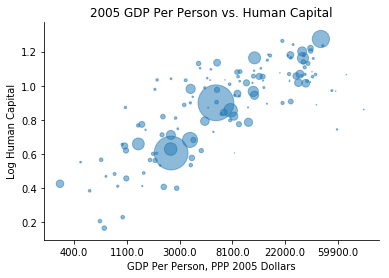

In [10]:
fig, ax = plt.subplots()

ax.scatter(np.log(pwt_2005["gdp_pop"]), np.log(pwt_2005["hc"]), # np.log() is taking a natural log transformation...
            s=pwt_2005['pop'], # THE NEW PART HERE! 
            alpha= 0.50) # Then this last command specifies how dark or light the bubbles are...


ax.set_title("2005 GDP Per Person vs. Human Capital")
ax.set_ylabel("Log Human Capital") 
ax.set_xlabel("GDP Per Person, PPP 2005 Dollars")

xlabel_list = np.exp(range(5,13)) # Now creat the list of lables by converting 5,6,etc. to levels
                                  # by taking exp.
xlabel_list = np.round(xlabel_list,-2) # Then round it so it looks nice.


ax.set_xticklabels(xlabel_list) # Then set the xtick labels.

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

plt.savefig("hc.png", bbox_inches="tight", dpi = 600)

plt.show()

### Tracking the Distribution over time 

In [11]:
# Here is an example to get a handle on this:

data_ex = {"Year": [2010,2010,2011,2011],
            "GDP": [1 , 2 , 3, 4],
            "INV": [10, 12, 13, 14],
            "CNT": ["USA", "ARG", "USA", "ARG"]}

weo  = pd.DataFrame(data_ex)

print(weo.groupby("Year").sum())
print(weo.groupby("Year").mean())

# This saying take the data frame, form a group by individual
# years, then sum accross the group. 

      GDP  INV
Year          
2010    3   22
2011    7   27
      GDP   INV
Year           
2010  1.5  11.0
2011  3.5  13.5


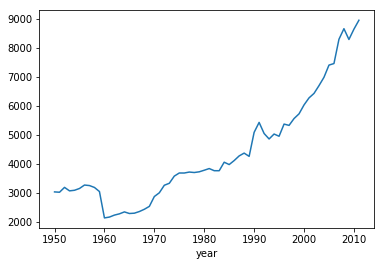

In [12]:
avg = pwt.groupby("year").gdp_pop.median() # This will compute the median, across countries, within a year

fig, ax  = plt.subplots()

avg.plot(ax = ax)

plt.show()

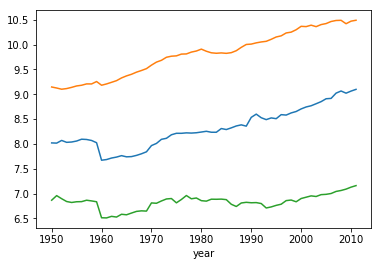

In [13]:
med = np.log(pwt.groupby("year").gdp_pop.median()) # This will compute the median, across countries, within a year
q90 = np.log(pwt.groupby("year").gdp_pop.quantile(0.90)) # This is going to compute the 90th percentile
q10 = np.log(pwt.groupby("year").gdp_pop.quantile(0.10)) # This is going to compute teh 10th percentile

# I'm doing this in logs for lots of reasons, try it without...

fig, ax  = plt.subplots()

med.plot(ax = ax)

q90.plot(ax = ax)

q10.plot(ax = ax)

plt.show()

#ax.fill_between(med.index, q10, q90, color = "b")

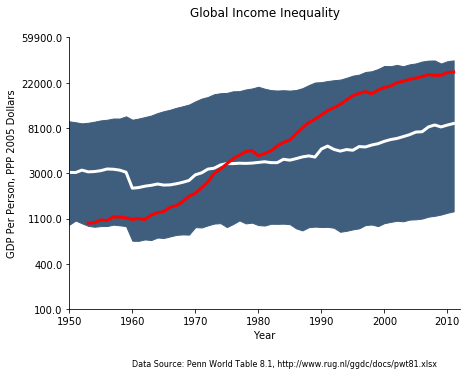

In [14]:
fig, ax  = plt.subplots()

med.plot(ax = ax, color = "white", lw = 3, figsize = (7,5))

ax.fill_between(med.index, q10, q90, color = "#3F5D7D") 
# This is the new option, we specify the x-axis, in this case the index,
# color in the areas between the bottom q10
# and the top, q90. Then I got this color from Randy olson blog, I like it.

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

###############################################################
# This is the new part

ax.plot(med.index, np.log(pwt[pwt.countrycode == "KOR"].gdp_pop), color = 'r', lw = 3)

# just plot on top, the x-axis, Korea's GDP per person, color, line width...

###############################################################

ax.set_yticks(range(5,12))
ax.set_xlim(1950,2012)
# This sets the yticks so we can see center the graph in the middle

y_label_list = np.exp(range(5,12))
y_label_list = np.round(y_label_list,-2)

ax.set_yticklabels(y_label_list)
# This process above generates informative labels for the y-axis
# so its not in log units, but in dollars

ax.set_title("Global Income Inequality\n") 
ax.set_ylabel("GDP Per Person, PPP 2005 Dollars")
ax.set_xlabel("Year")

ax.text(1960, 3.75, "Data Source: Penn World Table 8.1, " 
        "http://www.rug.nl/ggdc/docs/pwt81.xlsx", fontsize = 8)

plt.show()

### Styles

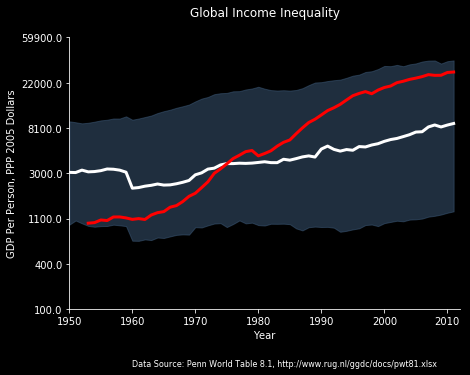

In [15]:
plt.style.use('dark_background')
#plt.xkcd()
# Here are some styles to trr
# 'fivethirtyeight' ,ggplot, bmh, dark_background, and grayscale

fig, ax  = plt.subplots()

med.plot(ax = ax, color = "white", lw = 3, figsize = (7,5))

ax.fill_between(med.index, q10, q90, color = "#3F5D7D", alpha = 0.5) 
# This is the new option, we specify the x-axis, in this case the index,
# color in the areas between the bottom q10
# and the top, q90. Then I got this color from Randy olson blog, I like it.

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

###############################################################
# This is the new part

ax.plot(med.index, np.log(pwt[pwt.countrycode == "KOR"].gdp_pop), color = 'r', lw = 3)

# just plot on top, the x-axis, Korea's GDP per person, color, line width...

###############################################################

ax.set_yticks(range(5,12))
ax.set_xlim(1950,2012)
# This sets the yticks so we can see center the graph in the middle

y_label_list = np.exp(range(5,12))
y_label_list = np.round(y_label_list,-2)

ax.set_yticklabels(y_label_list)
# This process above generates informative labels for the y-axis
# so its not in log units, but in dollars

ax.set_title("Global Income Inequality\n") 
ax.set_ylabel("GDP Per Person, PPP 2005 Dollars")
ax.set_xlabel("Year")

ax.text(1960, 3.75, "Data Source: Penn World Table 8.1, " 
        "http://www.rug.nl/ggdc/docs/pwt81.xlsx", fontsize = 8)

plt.show()

In [16]:
mpl.rcParams.update(mpl.rcParamsDefault)

%matplotlib inline